<a href="https://colab.research.google.com/github/VikaSvyat/DI_Bootcamp/blob/main/colab/DailyChallenge_MasteringData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving US Cars Dataset.zip to US Cars Dataset.zip


In [2]:
!unzip "US Cars Dataset.zip"
!ls

Archive:  US Cars Dataset.zip
  inflating: USA_cars_datasets.csv   
 sample_data   USA_cars_datasets.csv  'US Cars Dataset.zip'


In [3]:
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn preprocessing tools: StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler

# sklearn imputer: SimpleImputer
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv("USA_cars_datasets.csv")
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [5]:
print(df.shape)
print(df.info())
print(df.describe())

(2499, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB
None
        Unnamed: 0         price         year       mileage           lot
count  2499.000000   2499.000000  2499.000000  2.499000e+03  2.499000e+03
mean   1249.000000  

In [21]:
df10 = df['brand', ascending=False].head(10)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (ipython-input-915347363.py, line 1)

Box plot showing price distribution by brand (top 10 brands).

In [31]:
df10_brands = df['brand'].value_counts().head(10).index

df10 = df[df['brand'].isin(df10_brands)]
df10

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


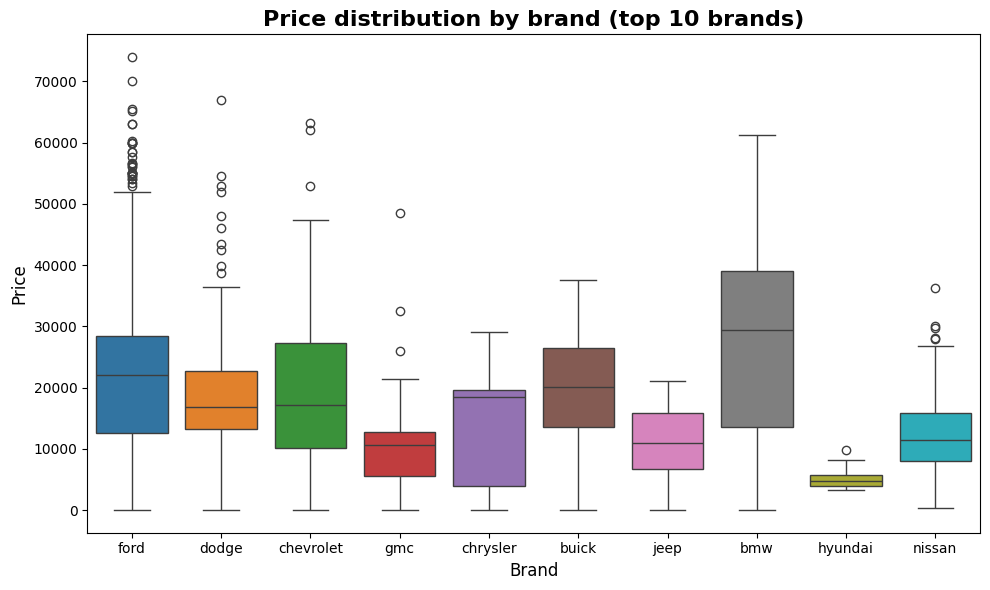

In [37]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df10, x='brand', y='price',
             hue='brand', #bins=50,
            #  kde=True
            )

plt.title('Price distribution by brand (top 10 brands)', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.tight_layout()
plt.show()

Interactive scatter plot of Price vs. Mileage, color-coded by Condition.


```
#I suppose that the distribution by condition in the task is written by mistake.
#Title_status is more informative in this dataset
```

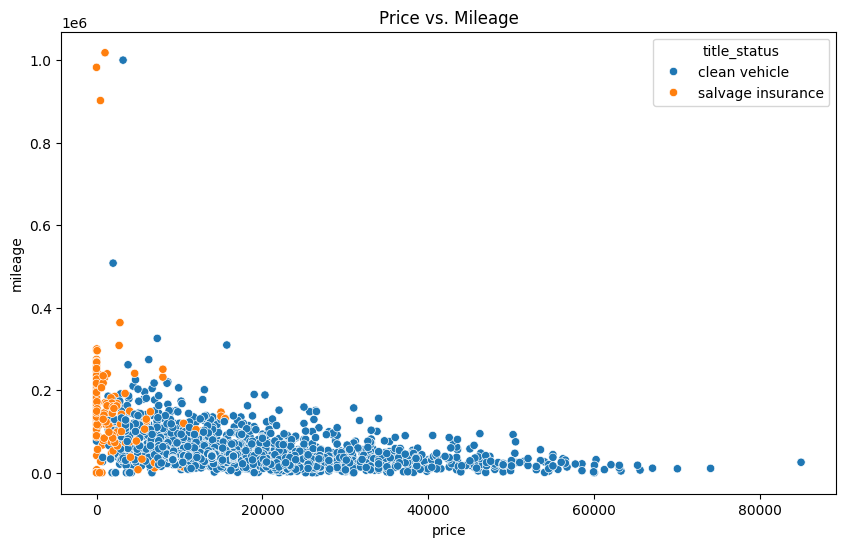

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='mileage',hue='title_status')
plt.title('Price vs. Mileage')
plt.show()

In [48]:
df_filtered = df[df['price'] < df['price'].quantile(0.99)]
df_filtered = df_filtered[df_filtered['mileage'] < df_filtered['mileage'].quantile(0.99)]

import plotly.express as px

fig = px.scatter(
    df_filtered,
    x='price',
    y='mileage',
    color='title_status',
    hover_data=['brand', 'model', 'year','condition'],  # extra info on hover
    trendline='ols',
    title='Price vs Mileage by Vehicle Status'
)

fig.show()


Heatmap of average prices by brand and condition.
```
#The same:
#I suppose that the distribution by condition in the task is written by mistake.
#Year(?) is more informative in this dataset
```

In [74]:
avg_price = df.groupby(['brand', 'year'])['price'].mean().unstack()


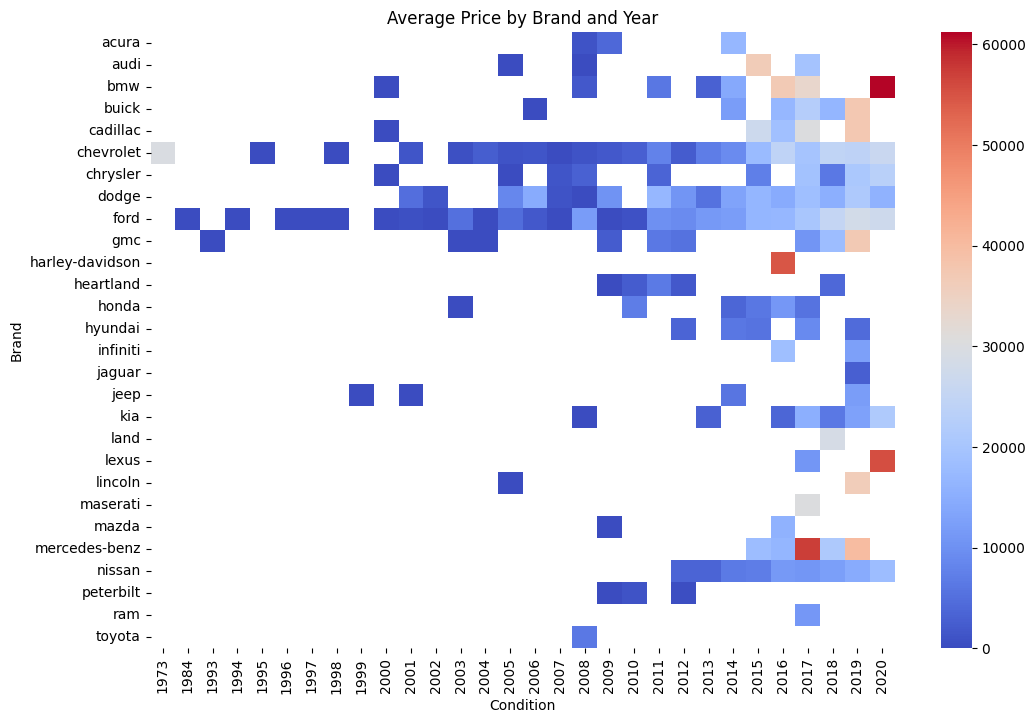

In [76]:
plt.figure(figsize=(12,8))

sns.heatmap(
    avg_price,
    # annot=True,
    # fmt='.0f',
    cmap='coolwarm'
)

plt.title('Average Price by Brand and Year')
plt.xlabel('Condition')
plt.ylabel('Brand')

plt.show()


In [70]:
avg_price_condition = df.groupby(['brand', 'condition'])['price'].mean().unstack()

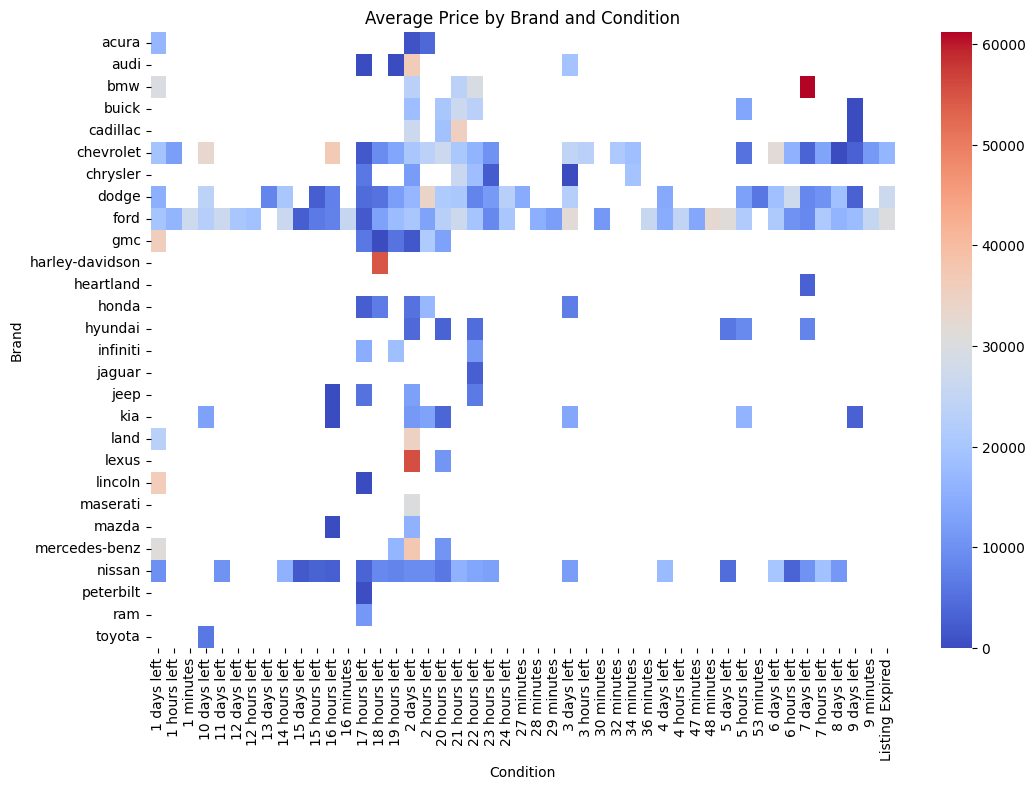

In [73]:
plt.figure(figsize=(12,8))

sns.heatmap(
    avg_price_condition,
    cmap='coolwarm'
)
plt.title('Average Price by Brand and Condition')
plt.xlabel('Condition')
plt.ylabel('Brand')
plt.show()